In [58]:
from pytube import YouTube, streams, request, Stream
from PIL import Image
import requests
from io import BytesIO
from hurry.filesize import size

In [2]:
def convert(seconds): 
    min, sec = divmod(seconds, 60) 
    hour, min = divmod(min, 60) 
    return "%d:%02d:%02d" % (hour, min, sec)

In [22]:
def getDetails(yt, url):
    print('**Título:** ', yt.title)
    print('**Autor:** ', yt.author)
    print('**Descrição do vídeo:**')
    print(yt.description)
    print('**Nº de Views:** {:,}'.format(yt.views).replace(',','.'))
    print('**Tempo de Vídeo:** ', convert(yt.length))
    print('**Classificação do Vídeo:** {:.2f}'.format(yt.rating))
    
    ys = yt.streams
    print('**Tamanho aprox.:** ', size(request.filesize(url)))
    versoes = {}
    for versao in ys.filter(file_extension='mp4', progressive=True):
        if versao.resolution is not None:
            versoes[versao.itag] = versao.resolution

    return ys, versoes

In [20]:
size(request.filesize(url))

'484K'

In [4]:
url = 'https://www.youtube.com/watch?v=Yw6u6YkTgQ4'
yt = YouTube(url)
size = request.filesize(url)

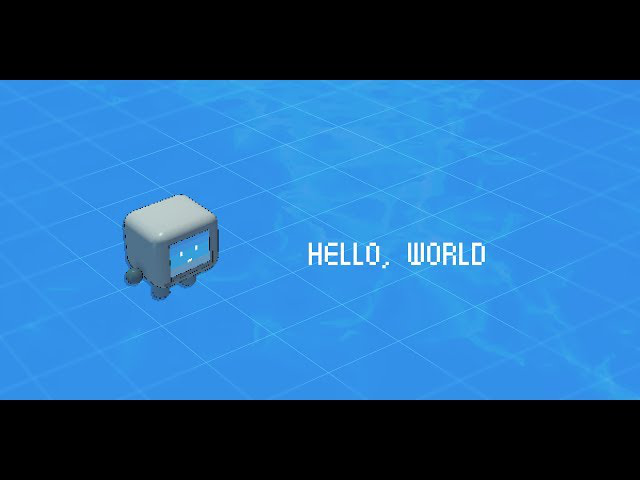

In [5]:
response = requests.get(yt.thumbnail_url)
thumb = Image.open(BytesIO(response.content))
thumb

In [25]:
yt.vid_info.keys()

dict_keys(['responseContext', 'trackingParams', 'adBreakParams', 'playabilityStatus', 'streamingData', 'playbackTracking', 'videoDetails', 'annotations', 'playerConfig', 'storyboards', 'attestation', 'playerSettingsMenuData'])

In [47]:
yt.vid_info['streamingData']['formats'][2]['mimeType'].split(';')[0]

'video/mp4'

In [49]:
def getMime(yt, version):
    for i in range(len(yt.vid_info['streamingData']['formats'])):
        if yt.vid_info['streamingData']['formats'][i]['itag'] == version:
            return yt.vid_info['streamingData']['formats'][i]['mimeType'].split(';')[0]

In [52]:
getMime(yt, 17)

'video/3gpp'

In [23]:
details, opcoes = getDetails(yt, url)

**Título:**  hello world
**Autor:**  Louie Zong
**Descrição do vídeo:**
a test of a virtual singer software - http://www.myriad-online.com/en/products/virtualsinger.htm

also, soundcloud! https://soundcloud.com/louie-zong/hello-world
**Nº de Views:** 9.367.125
**Tempo de Vídeo:**  0:01:55
**Classificação do Vídeo:** 4.98
**Tamanho aprox.:**  484K


In [7]:
opcoes


{18: '360p', 22: '720p'}

In [11]:
details.

[<Stream: itag="17" mime_type="video/3gpp" res="144p" fps="12fps" vcodec="mp4v.20.3" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="18" mime_type="video/mp4" res="360p" fps="24fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="22" mime_type="video/mp4" res="720p" fps="24fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="137" mime_type="video/mp4" res="1080p" fps="24fps" vcodec="avc1.640028" progressive="False" type="video">, <Stream: itag="248" mime_type="video/webm" res="1080p" fps="24fps" vcodec="vp9" progressive="False" type="video">, <Stream: itag="399" mime_type="video/mp4" res="1080p" fps="24fps" vcodec="av01.0.08M.08" progressive="False" type="video">, <Stream: itag="136" mime_type="video/mp4" res="720p" fps="24fps" vcodec="avc1.4d401f" progressive="False" type="video">, <Stream: itag="247" mime_type="video/webm" res="720p" fps="24fps" vcodec="vp9" progressive="False" type=

In [8]:
def downloadVersoes(detail, versao):
    dwn = detail.get_by_itag(versao)
    return dwn.download()
    
    

In [12]:
downloadVersoes(details, 22)

In [54]:
type(details.get_by_itag(22))

pytube.streams.Stream

In [56]:
x = downloadVersoes(details, 22)
print(x)

None


In [63]:
Stream.download(details.get_by_itag(22))

'd:\\github\\download-youtube\\hello world.mp4'

In [9]:
tmp = []
for chave, valor in opcoes.items():
    tmp.append(valor)
tmp

['360p', '720p']

In [10]:
newDict = [key for (key,value) in opcoes.items() if value in tmp[1]]
newDict[0]

22